# GANs para generar una fotografia de una galaxia

In [224]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [225]:
pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-n92z6khk
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-n92z6khk
  Resolved https://github.com/tensorflow/docs to commit 008b2116a3e6674dca5c988948982cdaa45517b2
  Preparing metadata (setup.py) ... done


In [226]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.model_selection import train_test_split
import tensorflow as tf
import time
import glob
import imageio
import h5py
import matplotlib.pyplot as plt
import os
import PIL
from IPython import display
import tensorflow_docs as tfdocs


# Read and separate the images and labels from the file
with h5py.File('/content/drive/MyDrive/Proyecto AC/Galaxy10SDSS.h5', 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])

# Define the classes names
galaxyClass = ['Disk, Face-on, No Spiral',
               'Smooth, Completely round',
               'Smooth, in-between round',
               'Smooth, Cigar shaped',
               'Disk, Edge-on, Rounded Bulge',
               'Disk, Edge-on, Boxy Bulge',
               'Disk, Edge-on, No Bulge',
               'Disk, Face-on, Tight Spiral',
               'Disk, Face-on, Medium Spiral',
               'Disk, Face-on, Loose Spiral']

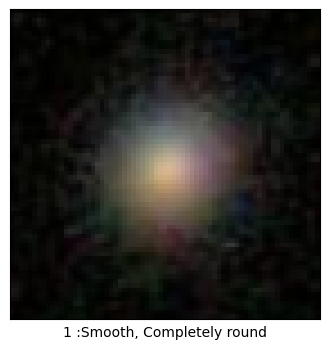

[[0.01176471 0.01960784 0.02352941 ... 0.01568628 0.02352941 0.02745098]
 [0.03921569 0.07450981 0.07450981 ... 0.01176471 0.01568628 0.01960784]
 [0.05098039 0.08627451 0.07058824 ... 0.01176471 0.01568628 0.02352941]
 ...
 [0.01960784 0.00784314 0.01176471 ... 0.04705882 0.03137255 0.01176471]
 [0.02745098 0.00784314 0.01568628 ... 0.05882353 0.04313726 0.02352941]
 [0.01176471 0.00392157 0.01176471 ... 0.05490196 0.04313726 0.01960784]]


In [227]:
images = images.astype(np.float32)/255
i = 45
Lsuma = np.dstack((images[i,:, :, 0], images[i,:, :, 1], images[i,:, :, 2]))
plt.figure(figsize=(4,5))
plt.imshow(Lsuma)
plt.xticks([])
plt.yticks([])
plt.xlabel(f'{labels[i]:.0f} :'+ galaxyClass[labels[i]])
plt.show()
print(images[i,:,:,1])

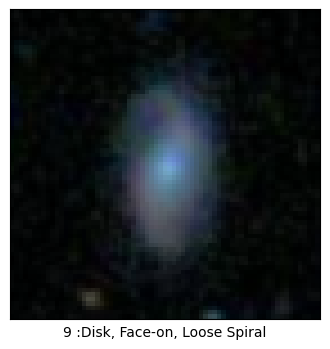

(519, 69, 69, 3)


In [228]:
def tipo_galaxia(i):
    images_tipo = []
    images_tipo_labels = []
    for j in range(len(labels)):
        if labels[j] == i:
            images_tipo.append(images[j, :, :, :])
            images_tipo_labels.append(i)
    return np.array(images_tipo), np.array(images_tipo_labels)

images_tipo_1, labels_1 = tipo_galaxia(9)

i = 16
Lsuma = np.dstack((images_tipo_1[i,:, :, 2], images_tipo_1[i,:, :, 1], images_tipo_1[i,:, :, 0]))
plt.figure(figsize=(4,5))
plt.imshow(Lsuma)
plt.xticks([])
plt.yticks([])
plt.xlabel(f'{labels_1[i]:.0f} :'+ galaxyClass[labels_1[i]])
plt.show()

print(images_tipo_1.shape)


In [229]:
print(images_tipo_1.shape[0])
BUFFER_SIZE = images_tipo_1.shape[0]
BATCH_SIZE = 19


train_dataset = tf.data.Dataset.from_tensor_slices(images_tipo_1).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

519


In [230]:
#Generador

def generator_():
    noise_shape = (100,)

    inputlyr = tf.keras.layers.Input(shape=noise_shape)

    denlyr = tf.keras.layers.Dense(8*8*256 , use_bias=False)
    actlyr00 = tf.keras.layers.LeakyReLU()
    normlyr00 = tf.keras.layers.BatchNormalization()

    reshlyr = tf.keras.layers.Reshape((8,8, 256))

    conTlyr01 = tf.keras.layers.Conv2DTranspose(64, (5,5), strides=(2, 2), padding ='same' )
    normlyr01 = tf.keras.layers.BatchNormalization()
    actlyr01 = tf.keras.layers.LeakyReLU()

    conTlyr02 = tf.keras.layers.Conv2DTranspose(64, (5,5),strides=(2, 2), padding = 'same')
    normlyr02 = tf.keras.layers.BatchNormalization()
    actlyr02 = tf.keras.layers.LeakyReLU()

    droplyr = tf.keras.layers.Dropout(0.5)

    conTlyr03 = tf.keras.layers.Conv2DTranspose(64, (5,5),strides=(2, 2),padding ='same' )
    normlyr03 = tf.keras.layers.BatchNormalization()
    actlyr03 = tf.keras.layers.LeakyReLU()

    outputlyr = tf.keras.layers.Conv2DTranspose(3, (6, 6), activation='tanh')


    model = tf.keras.Sequential([inputlyr,
                                 denlyr,
                                 actlyr00,
                                 normlyr00,
                                 reshlyr,
                                 conTlyr01,normlyr01,actlyr01,
                                 conTlyr02,normlyr02,actlyr02,
                                 droplyr,
                                 conTlyr03,normlyr03,actlyr03,
                                outputlyr
                                 ])
    #assert model.output_shape == (None, 69, 69, 3)
    return model

(1, 69, 69, 3)
1


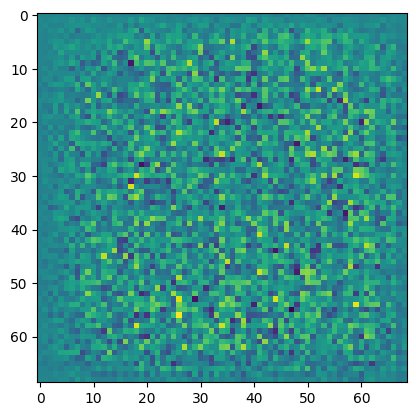

In [231]:
generator = generator_()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

print(generated_image.shape)


#plt.subplot(3, 1, 1)
#plt.imshow(generated_image[0, :, :, 0])
#plt.subplot(3, 1, 2)
#plt.imshow(generated_image[0, :, :, 1])
#plt.subplot(3, 1, 3)
#plt.imshow(generated_image[0, :, :, 2])

print(generated_image.shape[0])
plt.imshow((generated_image[0,:, :, 0]))#, generated_image[0,:, :, 1], generated_image[0,:, :, 2])))

In [232]:
# Discriminador

def discriminador_():
    inputlyr = tf.keras.layers.Input(shape=(69, 69, 3))
    conlyr01 = tf.keras.layers.Conv2D(64, (3,3))
    actlyr01 = tf.keras.layers.LeakyReLU()

    conlyr02 = tf.keras.layers.Conv2D(128, (3,3))
    actlyr02 = tf.keras.layers.LeakyReLU()

    conlyr03 = tf.keras.layers.Conv2D(64, (3,3))
    actlyr03 = tf.keras.layers.LeakyReLU()

    droplyr = tf.keras.layers.Dropout(0.5)

    flaplyr = tf.keras.layers.Flatten()

    outputlyr = tf.keras.layers.Dense(1, activation='sigmoid')


    model = tf.keras.Sequential([inputlyr,
                                 conlyr01, actlyr01,
                                 conlyr02, actlyr02,
                                 droplyr,
                                 conlyr03, actlyr03,
                                 droplyr,
                                 flaplyr,
                                 outputlyr
                                 ])

    return model

In [233]:
discriminator = discriminador_()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.500041]], shape=(1, 1), dtype=float32)


In [234]:
#Perdidas

loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

##Discriminate
def discriminator_loss(real_output, fake_output):
    real_loss = loss(tf.ones_like(real_output), real_output)
    fake_loss = loss(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

##Generador
def generator_loss(fake_output):
    return loss(tf.ones_like(fake_output), fake_output)


#Optimizadores
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)


In [235]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [236]:
EPOCHS = 200
noise_dim = 100
num_examples_to_generate = 4

seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [237]:
tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    #El gradiente
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [238]:
def generate_and_save_images(model, epoch, test_input):

  predictions = model(test_input, training=False)
  print(predictions.shape)
  fig = plt.figure(figsize=(5, 5))

  for i in range(predictions.shape[0]):
      plt.subplot(2, 2, i+1)
      predictions_color = np.dstack((predictions[i,:, :, 0],predictions[i,:, :, 1], predictions[i,:, :, 2]))
      plt.imshow(predictions_color);plt.title('Image = {}'.format(i))
      #plt.imshow(predictions[i,:,:,0],cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [239]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,epoch + 1, seed)

    # Save the model every 15 epochs
    #if (epoch + 1) % 15 == 0:
    #  checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator, epochs, seed)

(4, 69, 69, 3)


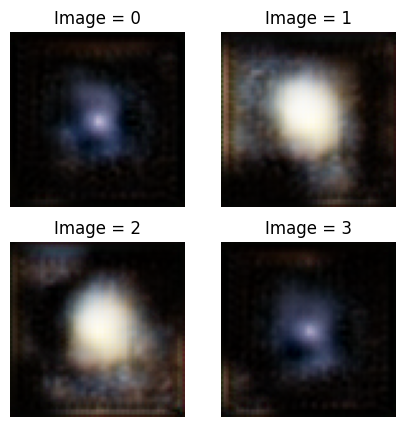

In [240]:
train(train_dataset, EPOCHS)

In [241]:
anim_file = 'dcgan3.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

<ipython-input-241-bee10f004cc4>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
<ipython-input-241-bee10f004cc4>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [242]:
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch3_{:04d}.png'.format(epoch_no))

In [243]:
anim_file = 'dcgan3.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

<ipython-input-243-bee10f004cc4>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
<ipython-input-243-bee10f004cc4>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [244]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

Output hidden; open in https://colab.research.google.com to view.